# 1.  Introduction

Employee attrition is a problem every business faces. While the primary reasons for attrition can differ, there may be common themes that are consistent across different job functions. Using a dataset from IBM, I will be exploring how attrition differs across departments and if a certain factors (e.g., work-life balance) significantly influences attrition. I'll test to see if the requisite data is normal and conduct an independent sample T-test to validate significance in the findings. If the distribution is not normal, I'll use a non-parametric test like the Kruskal Wallace test.

This research can benefit senior leadership within IBM, including HR. It may also be beneficial to other organizations as they benchmark their own employee attrition.

# 2. Hypothesis/ Research

I'll first explore which department is experiencing the highest attrition rate. Then I'll look to understand the impact of work/ life balance and distance to work from an employee's home.


Ho: There is no significant difference between the average attrition for employees with favorable work/life balance vs. those who have poor work/life balance

Ha: There is significant difference between the average attrition for employees with favorable work/life balance vs. those who have poor work/life balance

# 3. Data

The dataset comes from Kaggle with 1,470 observations and 35 variables. There are no missing values. In the interest of exploring a subset of variables, I am going to reduce the variables to several survey response questions. The survey questions are ranked 1 - 4, with 4 being positive. 

https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

In [1]:
import pandas as pd
import numpy as np
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = 'C:\\Users\Raj.Mehta\OneDrive - Wolters Kluwer\Downloads\WA_Fn-UseC_-HR-Employee-Attrition.csv'
df = pd.read_csv(path)

In [11]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_var
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,0


# 4. Methodology

For this analysis I will subset the data to only variables I'll be analyzing. I'll then create two data groups that capture employees who left IBM and customers who did not. Based on the count of attrition, it may be the best approach  to combine all 3 departments which will allow for a more interepretable and more stable result with a larger sample size and only two groups (customers who left vs. customers who stayed).

If the distributions appear to be close to normally distributed based on their histogram, skewness and kurtosis, I will conduct an independent samples t-test between the groups at the two-tail, 95% confidence interval. If not, I'll conduct Kruskal Wallace test. 

# 5. Results

# Which department has the highest attrition?

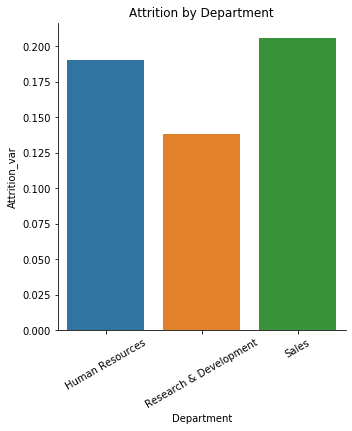

Department              Attrition_var
Human Resources         0                 51
                        1                 12
Research & Development  0                828
                        1                133
Sales                   0                354
                        1                 92
dtype: int64

In [130]:
# create new column that substitutes yes and no for 1 and 0 to facilitiate analysis
df['Attrition_var'] = df.Attrition.replace(('Yes', 'No'), (1, 0))

# reduce df to columns for analysis
col = ['Attrition_var', 'Department', 'DistanceFromHome', 'Education', 'JobSatisfaction', 'WorkLifeBalance','JobInvolvement']
df_subset = df.filter(items = col)
# attrition rate by department graph and total counts
df_mean = pd.DataFrame(df.groupby(['Department'])['Attrition_var'].mean()).reset_index()
g = sns.catplot(data =df_mean, x = 'Department', y = 'Attrition_var', kind = 'bar')
plt.setp(g.ax.get_xticklabels(), rotation=30);
plt.title('Attrition by Department')
plt.show()
df_subset.groupby(['Department','Attrition_var']).size()

Attrition rate is highest for sales followed by HR and then Research & Development. 

# How do responses to survey questions differ for employees who left IBM vs. employees who did not?

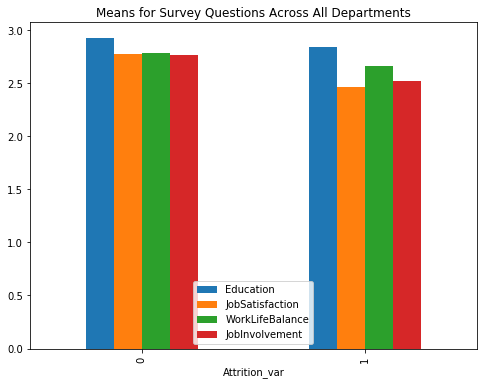

In [140]:
# Graph to see differences across certain response variables
survey_col = ['Education', 'JobSatisfaction', 'WorkLifeBalance','JobInvolvement']
#df_pairplot = pd.DataFrame(df_subset.groupby('Attrition_var')[survey_col].mean()).reset_index()
df_subset.groupby('Attrition_var')[survey_col].mean().plot(kind = 'bar', figsize = (8,6))
plt.title("Means for Survey Questions Across All Departments")
plt.show()

Employees on average had lower scores across job satisfaction, work/ life balance, and job involvement. While this makes intuitive sense, I would like to confirm that the differences observed between work/ life balance are meaningful.  

DescribeResult(nobs=1233, minmax=(1, 4), mean=2.781021897810219, variance=0.4649966821499667, skewness=-0.5396081234974706, kurtosis=0.5307560451640096)
DescribeResult(nobs=237, minmax=(1, 4), mean=2.6582278481012658, variance=0.6665951512550955, skewness=-0.46999525175732554, kurtosis=-0.23091544793990204)


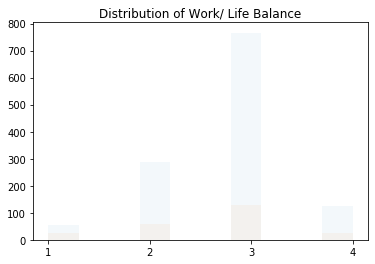

(0.7928595542907715, 5.970820204195391e-37)
(0.8374304175376892, 4.8441293328210875e-15)


In [158]:
df_subset_no_att = df_subset[(df_subset['Attrition_var'] == 0)]
df_subset_att = df_subset[(df_subset['Attrition_var'] == 1)]

print(stats.describe(df_subset_no_att['WorkLifeBalance']))
print(stats.describe(df_subset_att['WorkLifeBalance']))

plt.hist(df_subset_no_att['WorkLifeBalance'],alpha =.05)
plt.hist(df_subset_att['WorkLifeBalance'], alpha =.05)
plt.xticks(range(1,5))
plt.title("Distribution of Work/ Life Balance")
plt.show()


print(stats.shapiro(df_subset_no_att['WorkLifeBalance']))
print(stats.shapiro(df_subset_att['WorkLifeBalance']))

The shapiro test and graphs above confirm non-normal distribution for work/life balance. Therefore, I'll run a Kruskal-Wallace test. Note the null hypotheses is that there is no meaningful difference in work/ life balance for employees who attrite vs. employees who do not attrite. The alpha is .05.

In [113]:
print(stats.kruskal(df_subset_no_att['WorkLifeBalance'],df_subset_att['WorkLifeBalance']))

KruskalResult(statistic=3.9647480307735052, pvalue=0.046462475088493646)


The p-value is right at the cut-off and after looking at the data visually, I am going to fail to reject the null hypothesis.

# Are employees who travel further for work, on average, at higher risk for attrition?

DescribeResult(nobs=1233, minmax=(1, 29), mean=8.915652879156529, variance=64.2022953729158, skewness=1.0278532177701256, kurtosis=-0.049035971751739904)
DescribeResult(nobs=237, minmax=(1, 29), mean=10.632911392405063, variance=71.44518343703068, skewness=0.6318715334830777, kurtosis=-0.8674734233081853)


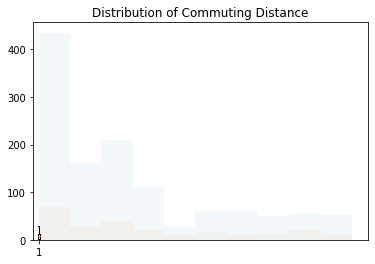

(0.8534793257713318, 2.4682859931885524e-32)
(0.8959434628486633, 9.868997979944893e-12)


In [144]:
print(stats.describe(df_subset_no_att['DistanceFromHome']))
print(stats.describe(df_subset_att['DistanceFromHome']))

# graph the distribution
plt.hist(df_subset_no_att['DistanceFromHome'],alpha =.05)
plt.hist(df_subset_att['DistanceFromHome'], alpha =.05)
plt.title("Distribution of Commuting Distance")
plt.show()

print(stats.shapiro(df_subset_no_att['DistanceFromHome']))
print(stats.shapiro(df_subset_att['DistanceFromHome']))

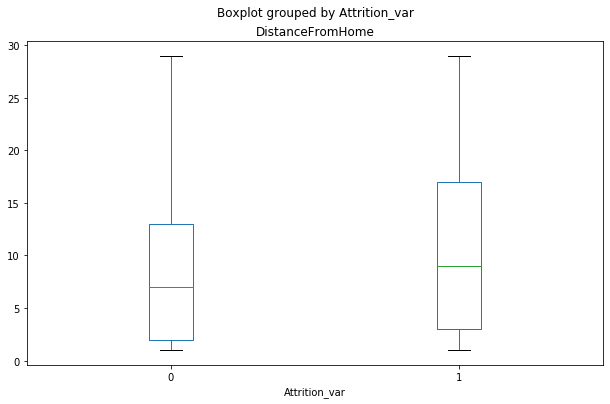

In [156]:
df_subset.boxplot('DistanceFromHome', by = 'Attrition_var', figsize = (10,6))
plt.grid(False)
plt.show()

Employees who have left IBM have, on average, a longer commute than those who stayed with the company. The range for both groups is between 1 and 29 miles. Based on the graph and the shapiro-wilkes test, it does not folow a normal-distribution and will require a non-parametric test. The boxplots show a wider variation and a higher average for employees who left IBM.

In [136]:
print(stats.kruskal(df_subset_no_att['DistanceFromHome'],df_subset_att['DistanceFromHome']))

KruskalResult(statistic=9.225723965000004, pvalue=0.002386383151703113)


After using the kruskal-wallace test, the p-value does fall in the range to reject the null hypothesis. The difference between the two averages does appear to be statistically significant. Employees who left had a wider variation, but additional information like traffic, commute time, and transportation method would be helpful data points to explain the differences, as well.

# 6. Recomendations and Results

Attrition appears to be highest in the sales department. Further analysis may be useful to understand specific factors that impact each department. Overall attrition did not appear to be significantly impacted by work/life balance, but further research into other independent variables (e.g., job satisfaction) may reveal more statistically significant impact. Employees who left IBM, traveled further for work on average compared to those who stated. The p-value (.002) indicates this appears to be a statistically significant difference. Collecting additional information like traffic, commute time, and transportation method would be helpful data points to explain the differences, as well.